In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import scipy.io as sio
import models as md
sns.set()

In [6]:
data = sio.loadmat('LVsVersusSubtendedAngle.mat')
clean_dict = {'lv': np.squeeze(data['LVs']), 'resp_angle': np.squeeze(data['subtendedAngleAtResponse'])}
df = pd.DataFrame(clean_dict)
df.describe()

,lv,resp_angle
count,246.000000,246.000000
mean,0.694752,43.558036
std,0.308021,27.765487
min,0.100000,14.290141
25%,0.451914,28.034274
50%,0.714518,34.141328
75%,0.971854,46.764871
max,1.195086,169.885266


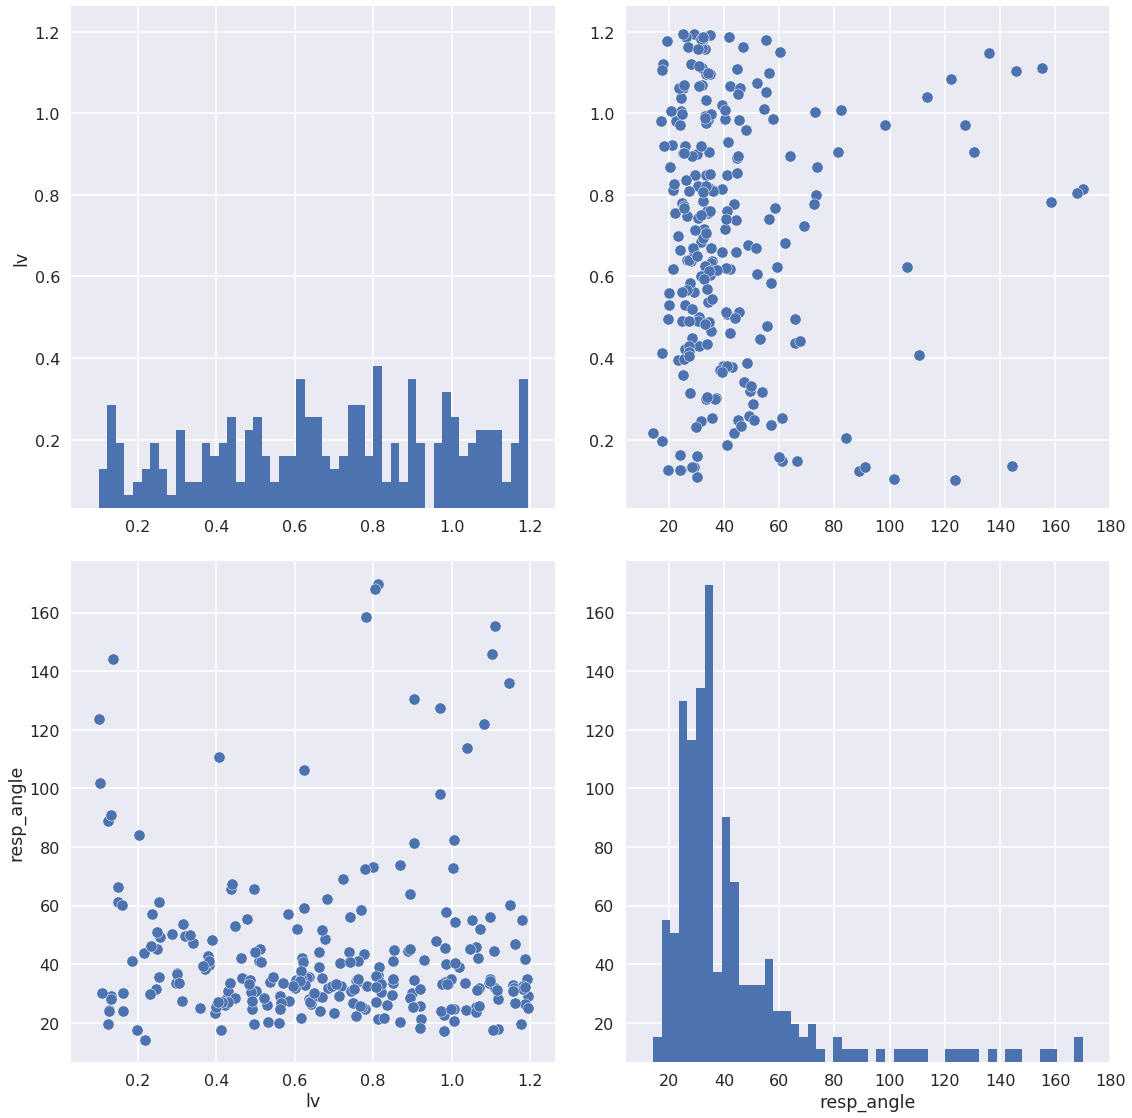

In [8]:
sns.set('poster')
g = sns.pairplot(df, size=8, diag_kws={'bins':50})

## Preuss et al. 2006

Text(0,0.5,'L/V [s]')

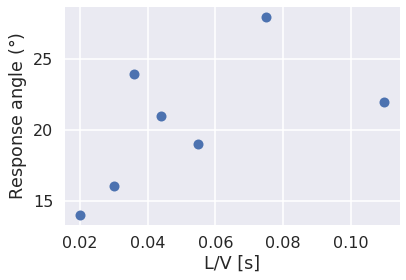

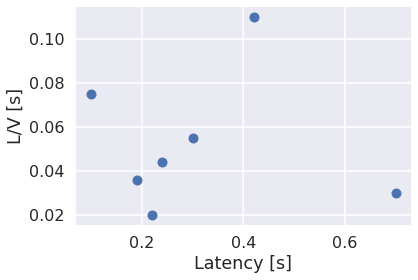

In [9]:
lv_vals = np.array([0.075, 0.036, 0.02, 0.044, 0.055, 0.11, 0.03])
theta_vals = np.array([28, 24, 14, 21, 19, 22, 16])
plt.figure()
plt.plot(lv_vals, theta_vals, '.', ms=20)
plt.xlabel('L/V [s]')
plt.ylabel('Response angle ($\degree$)')

latency_vals = np.array([0.1, 0.19, 0.22, 0.24, 0.3, 0.42, 0.7])
plt.figure()
plt.plot(latency_vals, lv_vals, '.', ms=20)
plt.xlabel('Latency [s]')
plt.ylabel('L/V [s]')

## Dill 1974

In [10]:
sizes = np.array([25.4]*4 + [38.1]*4 + [50.8]*4)
velocities = np.array([115.8, 435.9, 627.9, 1085.1]*3)
dill_lv_values = sizes/velocities
dill_response_distances = np.array([111.6, 138.0, 204.0, 252.0, 182.1, 224.1, 249.6, 330.0, 99.0, 248.1, 264.9, 313.5])
dill_response_angles = np.arctan2(sizes/2, dill_response_distances)*2
dill_response_angles_degrees = dill_response_angles/np.pi*180

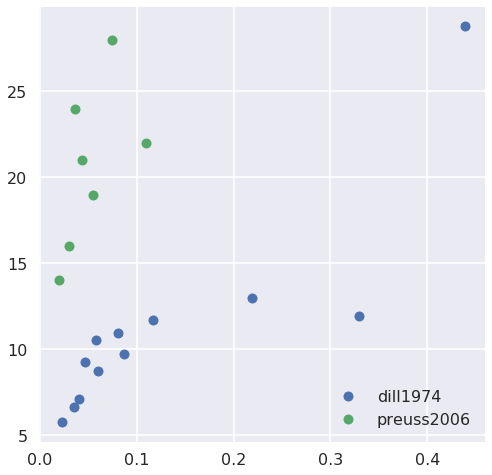

In [11]:
plt.figure(figsize=(8,8))
plt.plot(dill_lv_values, dill_response_angles_degrees, '.', ms=20, label='dill1974')
plt.plot(lv_vals, theta_vals, '.', ms=20, label='preuss2006')
plt.legend()

## Temizer et al. 2015, Figure 3D

In [12]:
temizer_lv_values = np.array([60, 60, 60, 60, 60, 60, 60,
                              120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
                              180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180,
                              240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240,
                              300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300])
temizer_theta_values = np.array([18, 18, 35, 35, 40, 65, 80,
                                 10, 15, 15, 15, 20, 20, 25, 25, 25, 25, 25, 30,
                                 15, 20, 20, 20, 20, 20, 20, 22, 25, 30, 30, 32, 40,
                                 10, 18, 18, 18, 18, 18, 20, 20, 20, 20, 25, 30, 30, 45,
                                 15, 18, 18, 18, 18, 20, 20, 20, 20, 25, 25, 35, 35, 60])

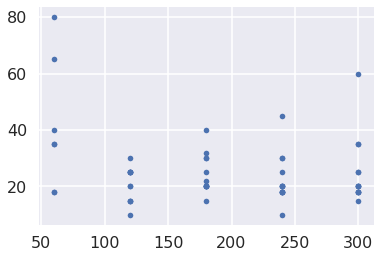

In [13]:
plt.plot(temizer_lv_values, temizer_theta_values, '.')
plt.show()

## Dunn et al. 2016 Figure 2 D and E

In [18]:
# in ms:
dunn_lv_values = np.array([510, 980, 1460, 1960, 2900])
dunn_theta_values = np.array([72, 68, 75, 68, 75])

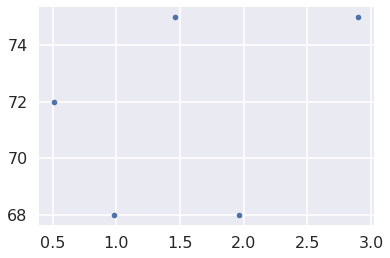

In [20]:
plt.plot(dunn_lv_values/1000, dunn_theta_values, '.')
plt.show()

## All together:

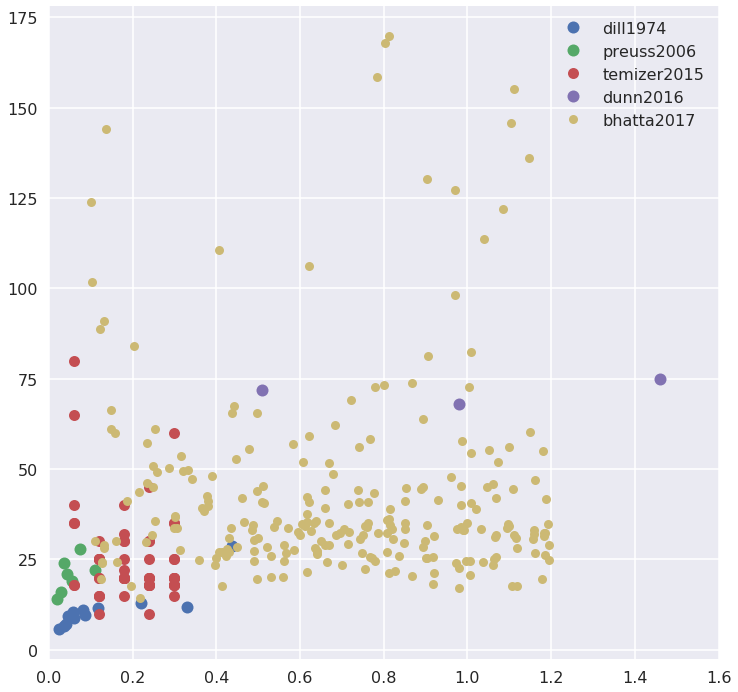

In [26]:
plt.figure(figsize=(12, 12))
plot_ms = 18
plt.plot(dill_lv_values, dill_response_angles_degrees, '.', ms=plot_ms+6, label='dill1974')
plt.plot(lv_vals, theta_vals, '.', ms=plot_ms+6, label='preuss2006')
plt.plot(temizer_lv_values/1000, temizer_theta_values, '.', ms=plot_ms+4, label='temizer2015')
plt.plot(dunn_lv_values/1000, dunn_theta_values, '.', ms=plot_ms+6, label='dunn2016')
plt.plot(clean_dict['lv'], clean_dict['resp_angle'], '.', ms=plot_ms, label='bhatta2017')

plt.xlim([0, 1.6])
plt.legend()